<a href="https://colab.research.google.com/github/hyeonn-06/data_analysis/blob/main/ch05_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown
gdown.download("http://bit.ly/3pK7iuu", "ns_book7.csv", quiet=False)

Downloading...
From: http://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 90.2MB/s]


'ns_book7.csv'

In [ ]:
import pandas as pd
ns_book7 = pd.read_csv("ns_book7.csv", low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [ ]:
count_by_year = ns_book7['발행년도'].value_counts()
count_by_year

,count
발행년도,
2012,18601
2014,17797
2009,17611
2011,17523
2010,17503
...,...
2548,1
1948,1
1967,1


In [ ]:
count_by_year = count_by_year.sort_index()
count_by_year

,count
발행년도,
1947,1
1948,1
1949,1
1952,11
1954,1
...,...
2551,1
2552,2
2559,1


In [ ]:
import datetime
yy = datetime.datetime.now().year

count_by_year = count_by_year[count_by_year.index <=  yy]
count_by_year

,count
발행년도,
1947,1
1948,1
1949,1
1952,11
1954,1
...,...
2018,16423
2019,15220
2020,11834


In [ ]:
import numpy as np
# 주제분류번호의 1번째 숫자만 선택 (1번째 숫자가 대분류 숫자)
# 0 : 종류 / 1 : 철학 / 2 : 종교 / 3 : 사회과학 / 4 : 자연과학/ 5 : 기술과학 / 6 : 예술 / 7 : 언어 / 8 : 문학 / 9 : 역사
# 0으로 시작하는 것도 있기 떄문에 주제분류번호는 string 타입
def kdc_1st_char(no):
  if no is np.nan:
    return "-1"
  else:
    return no[0]

count_by_subject = ns_book7['주제분류번호'].apply(kdc_1st_char).value_counts()
count_by_subject

,count
주제분류번호,
8,108643
3,80767
5,40916
9,26375
6,25070
1,22647
-1,16978
7,15836
4,13688


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

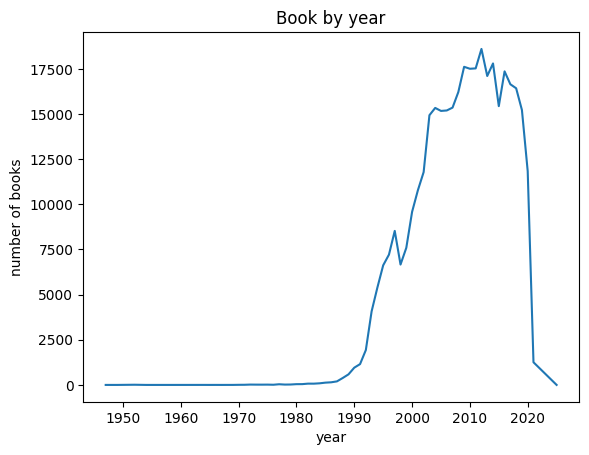

In [ ]:
plt.plot(count_by_year.index, count_by_year.values)
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

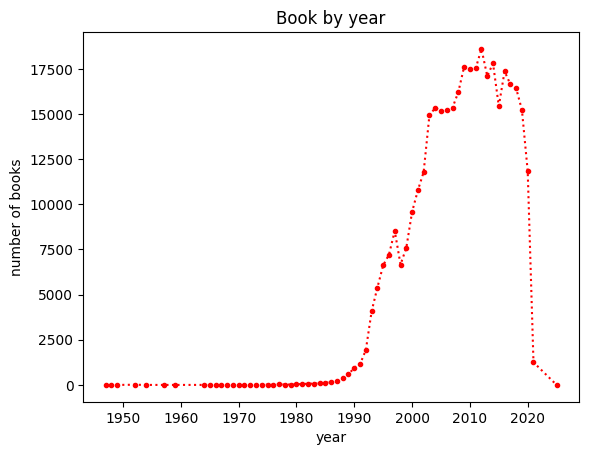

In [ ]:
# linestyle 종류
# 실선 : '-' / 점선 : ':' / 쇄선 : '-.' / 파선 '--'
# plt.plot(count_by_year, marker='.', linestyle=':', color='red')
plt.plot(count_by_year, '.:r')
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

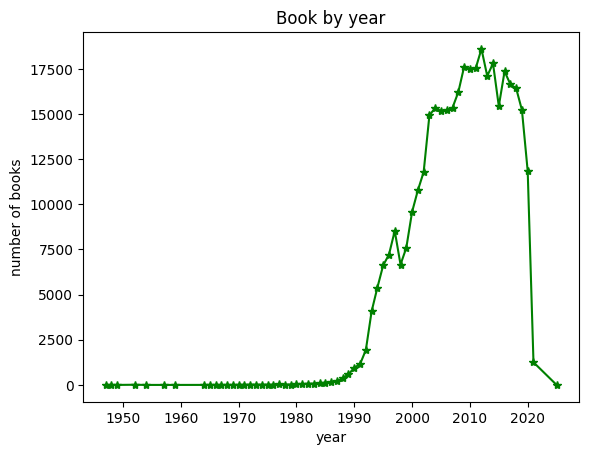

In [ ]:
plt.plot(count_by_year,"*-g")
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

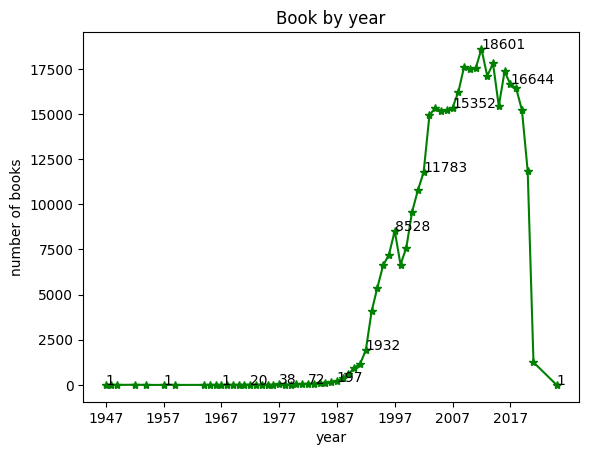

In [ ]:
plt.plot(count_by_year,"*-g")
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, yy, 10))
# [::?] -> ?씩 증가하며 데이터프레임의 시작부터 끝까지의 값을 선택
for idx, val in count_by_year[::5].items():
  # annotate(str, (x,y)) : 그래프의 (x,y)좌표에 str 출력
  plt.annotate(val, (idx, val))
plt.show()

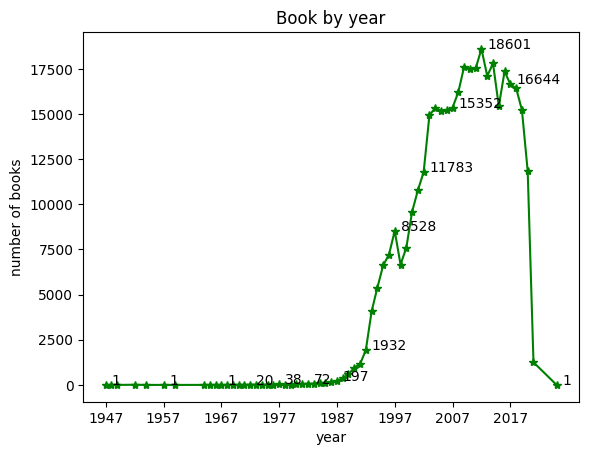

In [ ]:
plt.plot(count_by_year,"*-g")
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, yy, 10))
for idx, val in count_by_year[::5].items():
  # annotate(str, (x,y), xytext=(x+?,y+?)) : 그래프의 (x+?,y+?)좌표에 str 출력
  plt.annotate(val, (idx, val), xytext=(idx+1, val+10))
plt.show()

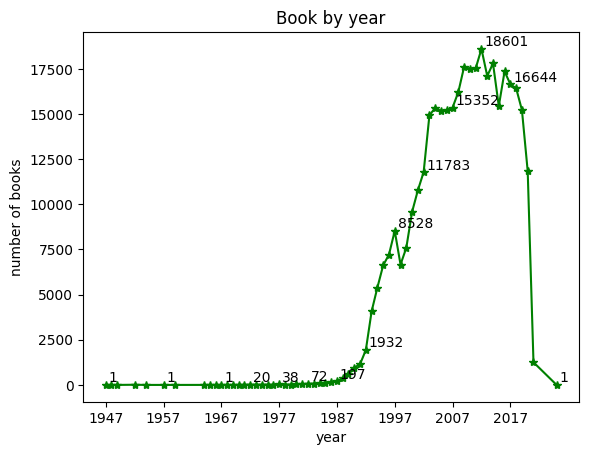

In [ ]:
plt.plot(count_by_year,"*-g")
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, yy, 10))
for idx, val in count_by_year[::5].items():
  # annotate(str, (x,y), xytext=(x1,y1), textcoords="offset points") : 그래프의 (x,y)좌표에서 x1포인트, y1포인트 떨어진 위치에 str 출력
  # 1포인트 당 1/72인치
  # 픽셀 단위 지정을 하기 위해서는 textcoords="offset pixels"
  plt.annotate(val, (idx, val), xytext=(2, 2), textcoords="offset points")
plt.show()

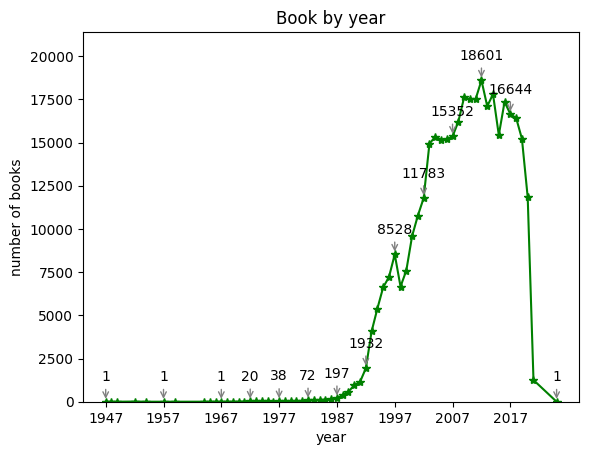

In [ ]:
plt.plot(count_by_year,"*-g")
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
# y축 데이터 범위 확대
plt.ylim(0, count_by_year.values.max() * 1.15)
plt.xticks(range(1947, yy, 10))
for idx, val in count_by_year[::5].items():
  # annotate(str, (x,y), xytext=(x1,y1), textcoords="offset points") : 그래프의 (x,y)좌표에서 x1포인트, y1포인트 떨어진 위치에 str 출력
  # 1포인트 당 1/72인치
  # 픽셀 단위 지정을 하기 위해서는 textcoords="offset pixels"
  plt.annotate(val, (idx, val), xytext=(0, 15), textcoords="offset points",
               # 데이터 가운데 정렬 및 화살표 표시
               ha="center", arrowprops=dict(arrowstyle="->", color="gray"))
plt.show()

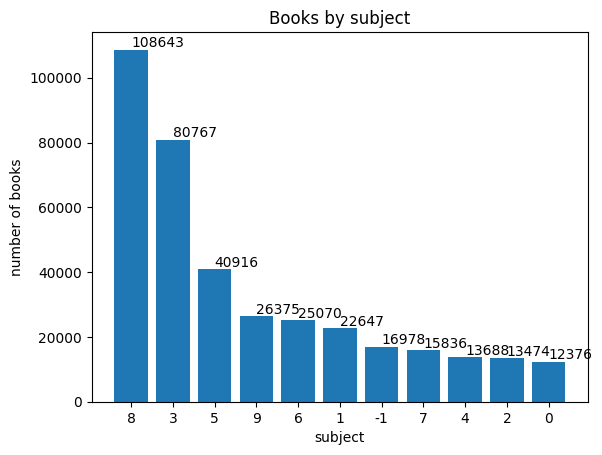

In [ ]:
plt.bar(count_by_subject.index, count_by_subject.values)
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
  plt.annotate(val, (idx, val), xytext=(0,2), textcoords="offset points")
plt.show()

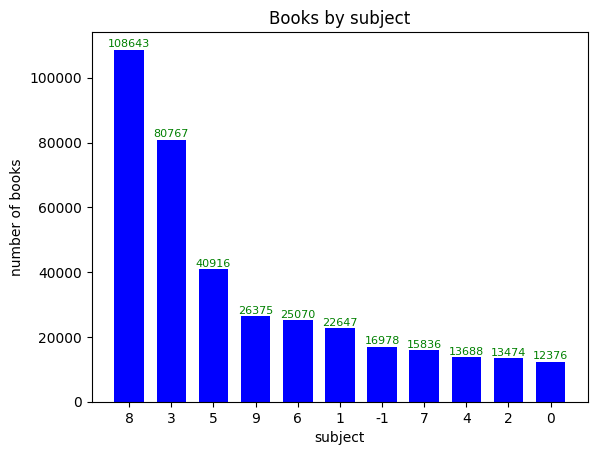

In [ ]:
# width 매개변수 : 세로 막대 그래프의 너비 조정 (default 값 = 0.8)
plt.bar(count_by_subject.index, count_by_subject.values, width=0.7, color="blue")
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
  # ha 매개변수 * ha(horizontal alignment) : 수평 정렬 (가로 방향 정렬)
  # ha = right (defalut) : 오른쪽 정렬
  # ha = center : 가운데 정렬
  # ha = left : 왼쪽 정렬
  plt.annotate(val, (idx, val), xytext=(0,2), textcoords="offset points", fontsize=8, ha="center", color="green")
plt.show()

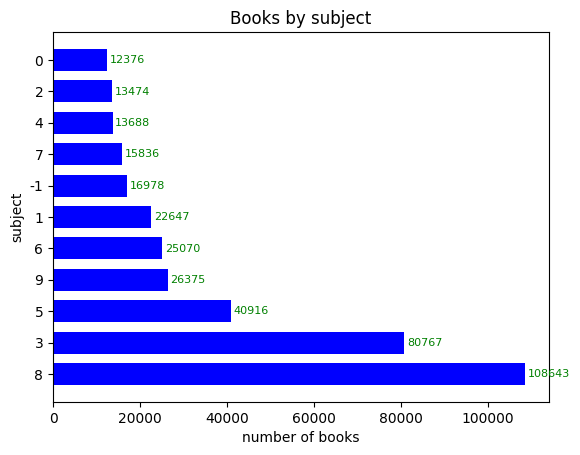

In [ ]:
# barh (bar horizontal) : 수평 막대 그래프 (가로 방향 막대 그래프)
# height 매개변수 : 가로 막대 그래프의 너비 조정 (가로 막대 그래프이기 때문에 width 대신 height 사용)
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color="blue")
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in count_by_subject.items():
  # va 매개변수 * va(vertical alignment) : 수직 정렬 (세로 방향 정렬)
  # va = baseline (defalut) : 텍스트 밑면을 막대 중앙 맞춤
  # va = center : 가운데 정렬
  # va = top : 위로 정렬
  # va = bottom : 아래로 정렬
  plt.annotate(val, (val, idx), xytext=(2,0), textcoords="offset points", va="center", fontsize=8, color="green")
plt.show()

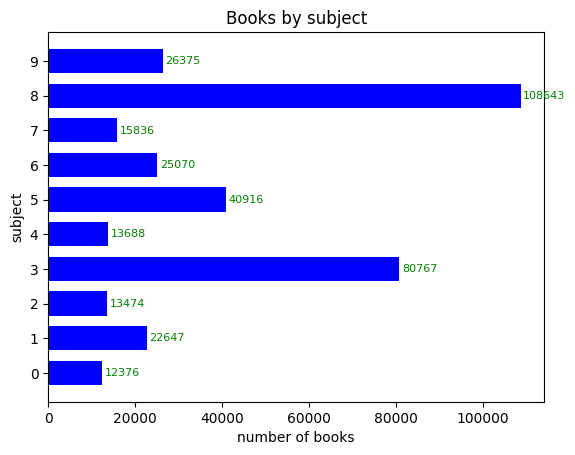

In [ ]:
# 주제분류번호 시작숫자가 "-1"인 데이터는 의미 x -> 제거 혹은 "-1"이 아닌 데이터만 처리 (0 ~ 9)
count_by_subject = count_by_subject[count_by_subject.index != "-1"].sort_index() # index로 정렬
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color="blue")
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in count_by_subject.items():
  plt.annotate(val, (val, idx), xytext=(2,0), textcoords="offset points", va="center", fontsize=8, color="green")
plt.show()

In [ ]:
import sys
if "google.colab" in sys.modules:
  print("구글 코랩에서 실행 중입니다.")
  # ! : Jupyter Notebook이나 Google Colab에서 터미널 명령어를 실행할 때 사용
  # wget : 웹에서 파일을 다운로드하는 명령어
  # -O : 저장한 파일 이름 지정하는 명령어
  !wget https://bit.ly/3wrj4xf -O jupiter.png

--2025-04-18 00:29:49--  https://bit.ly/3wrj4xf
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/rickiepark/hg-da/main/jupiter.png [following]
--2025-04-18 00:29:49--  https://raw.githubusercontent.com/rickiepark/hg-da/main/jupiter.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3287363 (3.1M) [image/png]
Saving to: ‘jupiter.png’

jupiter.png         100%[===================>]   3.13M  --.-KB/s    in 0.08s   

2025-04-18 00:29:50 (40.6 MB/s) - ‘jupiter.png’ saved [3287363/3287363]



In [ ]:
img = plt.imread("jupiter.png")
img.shape

(1561, 1646, 3)

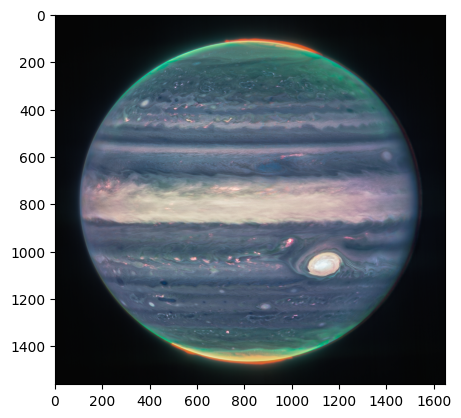

In [ ]:
plt.imshow(img)
plt.show()

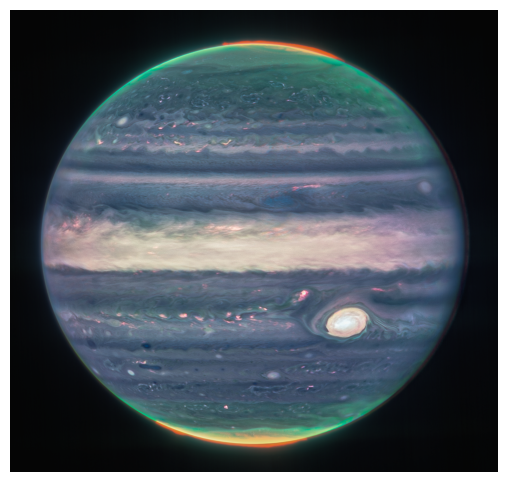

In [ ]:
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis("off")
plt.show()

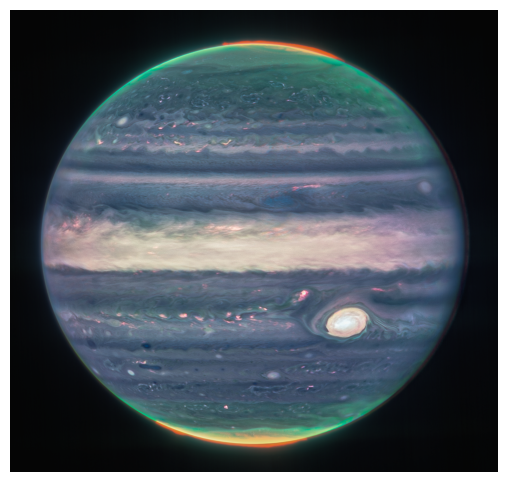

In [ ]:
from PIL import Image

pil_img = Image.open('jupiter.png')
plt.figure(figsize=(8,6))
plt.imshow(pil_img)
plt.axis("off")
plt.show()

In [ ]:
import numpy as np

arr_img = np.array(pil_img)
arr_img.shape

(1561, 1646, 3)

In [ ]:
plt.imsave("jupiter.jpg", arr_img)

In [ ]:
plt.rcParams['savefig.dpi']

'figure'

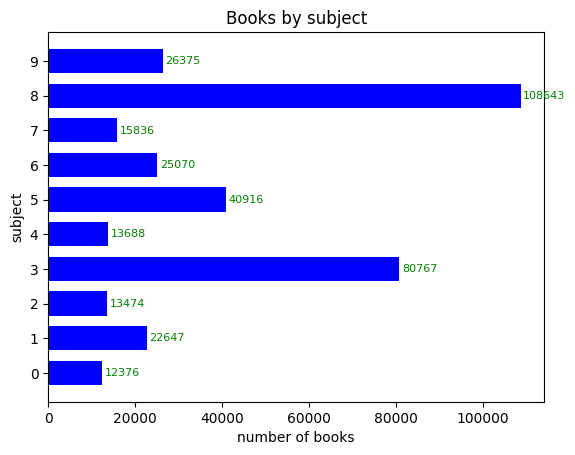

In [48]:
count_by_subject = count_by_subject[count_by_subject.index != "-1"].sort_index()
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color="blue")
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in count_by_subject.items():
  plt.annotate(val, (val, idx), xytext=(2,0), textcoords="offset points", fontsize=8, va="center", color="green")
plt.savefig("books_by_subject.png")
plt.show()

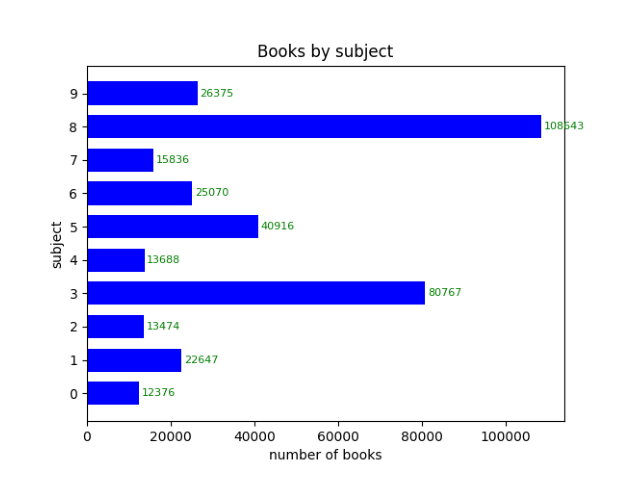

In [49]:
pil_img = Image.open("books_by_subject.png")

plt.figure(figsize=(8,6))
plt.imshow(pil_img)
plt.axis("off")
plt.show()